In [ ]:
# Este es el modelo de regresión 1 para la Estrategia 1. Trabajaremos con el 20% del dataset para validación.   

In [2]:
# Paso 1: Importar las bibliotecas necesarias

import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from joblib import load


In [3]:
# Paso 2: Carga de datos 

df_val = pd.read_csv("../data/feature_engineering_final.csv")



In [4]:
# Separar características (X) y variable objetivo (y)
X = df_val.drop(columns="price")
y = df_val["price"]

In [5]:
# # Aplicar log1p a y para simular el mismo procesamiento que el modelo usó

# y_log = np.log1p(y)

In [6]:
#3. Cargar el modelo entrenado ===
modelo_cat = load("../model/Modelo1_regresion_cat_logY.pkl")

In [7]:
#4. Hacer predicciones en escala log ===
y_pred_log = modelo_cat.predict(X)

In [8]:
# 5. Volver a escala original ===
y_pred = np.expm1(y_pred_log)

In [9]:
# 6. Calcular MAE en la escala original ===
mae = mean_absolute_error(y, y_pred)

In [10]:
print(f"✅ MAE en nuevo dataset: {mae:.2f}")

✅ MAE en nuevo dataset: 2752.98


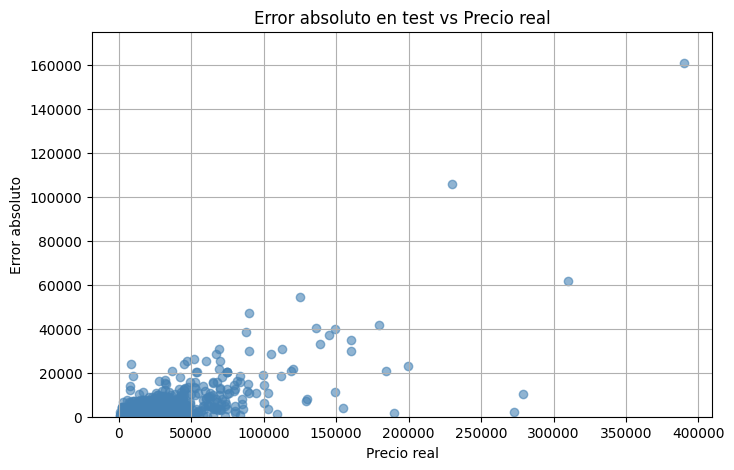

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular errores absolutos
errores_abs_test = np.abs(y.values - y_pred)

# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(y, errores_abs_test, alpha=0.6, c='steelblue')
plt.xlabel('Precio real')
plt.ylabel('Error absoluto')
plt.title('Error absoluto en test vs Precio real')
plt.ylim(0, 175000)  # Ajusta este valor según la escala de tu dataset
plt.grid(True)
plt.show()